In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
from scipy.stats import norm
import matplotlib.mlab as mlab

In [2]:
wine_data = pd.read_csv('../data/rawdata/wine-reviews/winemag-data-130k-v2.csv')

In [3]:
clean_data = wine_data.dropna(subset=['country', 'price', 'points'])

In [5]:
Wine_types={'Bold Red': ['Malbec', 'Syrah', 'Shiraz', 'Mourvedre', 'Pinotage', 'Petite Sirah', 'Touriga Nacional', 'Cabernet Sauvignon', 'Bordeaux Blend', 'Meritage'],
          'Medium Red': ['Meriot', 'Sangiovese', 'Zinfandel','Cabernet Franc', 'Tempranillo', 'Nebbiolo', 'Barbera', 'Cotes du Rhone Blend'],
          'Light Red':[ 'Pinot Noir', 'Grenache', 'Gamay', 'St. Laurent', 'Carignan', 'Counoise'],
          'Rich White': ['Chardonnay', 'Semillon','Viognier', 'Marsanne', 'Roussanne'],
          'Light White': ['Sauvignon Blanc', 'Albarino', 'Pitot Blanc', 'Vermentino', 'Melon de Bourgogne', 'Gargenega', 'Trebbiano', 'Pinot Gris', 'Pinot Grigio'],
          'Sweet White': ['Moscato', 'Riesling', 'Chenin Blanc', 'Gewurztraminer', 'Late Harvest Whites', 'Alascian Pinot Gris'],
          'Rose': ['Provencal Rose', 'White Zinfandel', 'Loire Valley Rose', 'Pinot Noir Rose', 'Syrah Rose', 'Garnache Rosado', 'Bandol Rose', 'Tempranilio Rose', 'Saignee Method Rose'],
          'Sparkling': ['Champagne', 'Prosecco', 'Cremant', 'Cava', 'Metodo Classico', 'Sparkling Wine', 'Sparkling Rose'],
          'Dessert': ['Port', 'Sherry', 'Maderia', 'Vin Santo', 'Muscat', 'PX', 'Pedro Ximenez']
          }
Wine_types.keys()

dict_keys(['Bold Red', 'Medium Red', 'Light Red', 'Rich White', 'Light White', 'Sweet White', 'Rose', 'Sparkling', 'Dessert'])

In [6]:
# Re clasify wine varieties 
df_variety=pd.DataFrame()
for x in Wine_types.keys():
   wt=pd.DataFrame([])
   for y in range(len(Wine_types[x])):
       #print('type=',x,'subtype=',Wine_types[x][y])
       wt=wt.append(clean_data[clean_data.variety.str.contains(Wine_types[x][y],na=False)])
       wt.head()
   wt.variety=x
   df_variety=df_variety.append(wt)

df_variety.groupby('variety')['price'].apply(lambda x: x.count())

variety
Bold Red       19719
Dessert         4068
Light Red      14877
Light White     7602
Medium Red     12582
Rich White     12791
Sparkling       1412
Sweet White     5930
Name: price, dtype: int64

# How are taster ratings distributed?

#### Lets create a histogram to visualize the distribution of ratings

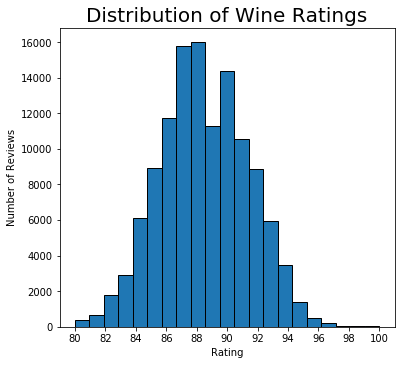

In [7]:
# Plot histogram
plt.figure(figsize=(6,5.5))
x = clean_data['points']
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, edgecolor='k',histtype='bar')
plt.xticks(range(80,101,2))
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Wine Ratings',fontsize=20)
plt.savefig("../reports/images/09_Distribution_of_Wine_Ratings.png",bbox_inches="tight")
plt.show()

#### Ratings seem to follow a normal distribution, lets fit our data using that distribution and see how well it fits.

C:\Users\alaq3\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


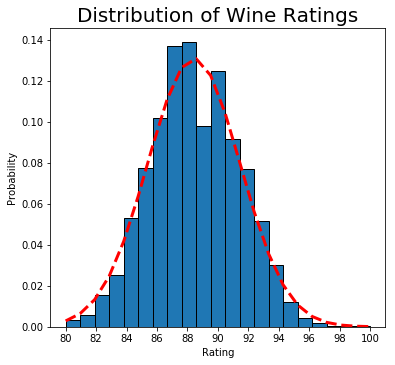

In [8]:
# Plot probability distribution for taster ratings
plt.figure(figsize=(6,5.5))
x = clean_data['points']
num_bins = 21
(mu, sigma) = norm.fit(x)
n, bins, patches = plt.hist(x, num_bins, density=1, edgecolor='k',histtype='bar')
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=3)
plt.xticks(range(80,101,2))
plt.xlabel('Rating')
plt.ylabel('Probability')
plt.title('Distribution of Wine Ratings',fontsize=20)
plt.savefig("../reports/images/10_Fit_Distribution_of_Wine_Ratings.png",bbox_inches="tight")
plt.show()

In [9]:
pd.DataFrame({'Mean':[mu],'StdDev':[sigma]})

,Mean,StdDev
0,88.421723,3.044929


# How do average ratings compare among each taster?

#### Lets group by tasters and take the average of ratings

In [10]:
taster_reviews = clean_data.groupby('taster_name').mean()
taster_reviews = taster_reviews.reset_index()
taster_reviews = taster_reviews.sort_values(by='points')

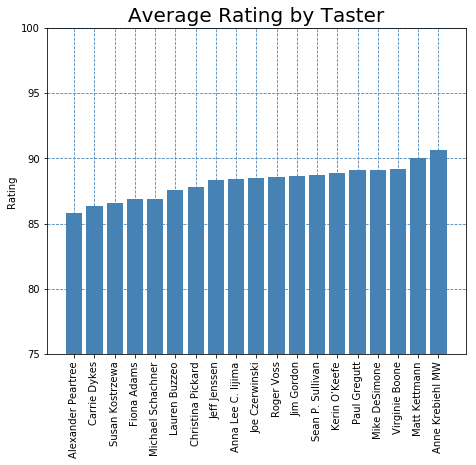

In [23]:
# Plot the average rating for each taster
plt.figure(figsize=(7.5,6))
plt.bar(taster_reviews.taster_name,taster_reviews.points,color='steelblue')
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.title('Average Rating by Taster',fontsize=20)
plt.ylim(75,100)
plt.grid(linestyle='--',color='steelblue')
plt.savefig("../reports/images/11_Avg_Rating_Taster.png",bbox_inches="tight")
plt.show()

In [24]:
#Create a dataframe with min, max ratings
pd.DataFrame({'Min':[taster_reviews.points.min()],'Max':[taster_reviews.points.max()]})

,Min,Max
0,85.854722,90.61257


#### The average rating for all tasters fall inside one standard deviation from the mean. We do not see a reviewer diverting significantly from the mean. We have also look at box plots 

# Do tasters show a preference to review certain wine varieties? 

In [13]:
# Groping by tasters and variety
taster_variety = df_variety.groupby(['taster_name','variety'])['points'].count()
taster_variety = taster_variety.reset_index()

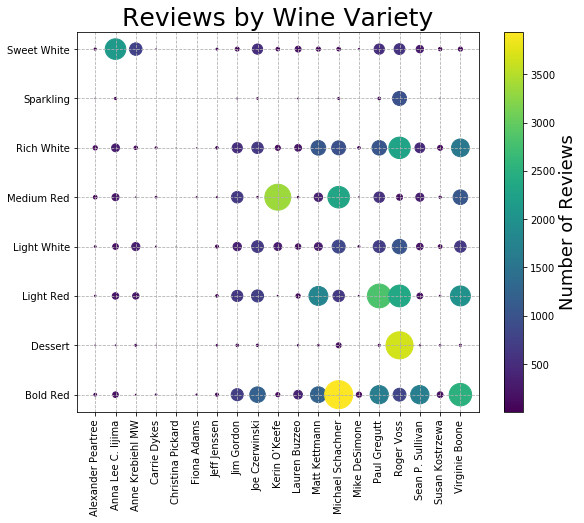

In [14]:
# Create a scatter plot of variety and tasters
plt.figure(figsize=(9,7))
plt.scatter(taster_variety.taster_name,taster_variety.variety,s=taster_variety.points*.2,c=taster_variety.points)
plt.xticks(rotation=90)
plt.grid(linestyle='--')
cbar=plt.colorbar()
cbar.set_label('Number of Reviews', size=18)
plt.title('Reviews by Wine Variety',fontsize=25)
plt.savefig("../reports/images/12_Review_by_Wine_Variety.png",bbox_inches="tight")
plt.show()

### We see that tasters tend to review wines across several varieties and although not in equal numbers.

# Do tasters show a preference to review wines from specific countries?

In [15]:
# Groping by tasters and country
taster_country = df_variety.groupby(['taster_name','country'])['points'].count()
taster_country = taster_country.reset_index()

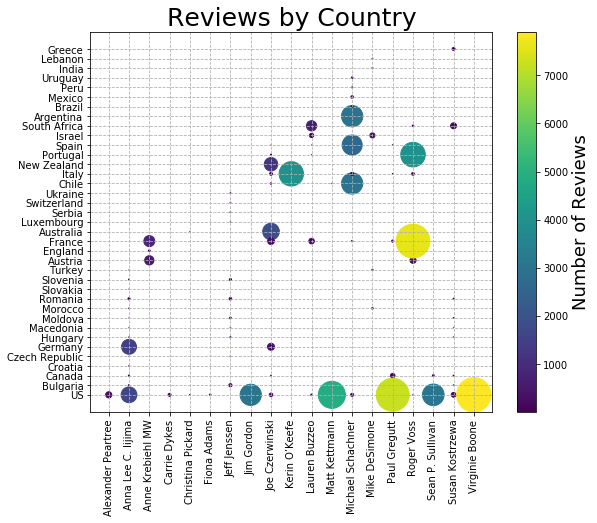

In [16]:
# Create a scatter plot of country and tasters
plt.figure(figsize=(9,7))
plt.scatter(taster_country.taster_name,taster_country.country,s=taster_country.points*.15,c=taster_country.points)
plt.xticks(rotation=90)
plt.grid(linestyle='--')
cbar=plt.colorbar()
cbar.set_label('Number of Reviews', size=18)
plt.title('Reviews by Country',fontsize=25)
plt.savefig("../reports/images/13_Reviews_by_Country.png",bbox_inches="tight")
plt.show()

### We do see that tasters tend to favor reviewing wines from specific countries. For example, Virginie Boone and Kerin O'keefe have both reviwed wine from one country and Roger Voss has mode over 10,000 reviews the vast majority for wines from France and Portugal.